In [1]:
import pandas as pd
import pypowhegparse as ppp
pd.set_option('display.max_columns', None)
folder = "/home/apn/git/POWHEG-BOX-V2/directphotonjj/testrun-lhc/"

## Checklimits

In [2]:
ppp.print_stats(folder)
ppp.print_warn_grep(folder,3)



#WARN    =  0
#WWARN   =  0
#WWWARN  =  0
#WWWWARN =  0


## Counters

In [3]:
#ddf = ppp.load_counter_folder(folder)
#ddf.xs("pwgcounters-st4").describe()

In [4]:
#ppp.multi_describe(ddf)#[["real time (sec)"]]

## Stat

In [5]:
ddf = ppp.load_stat_folder(folder)
#ddf.xs("pwg-0001-stat.dat").describe()

In [6]:
ppp.multi_describe(ddf)

proc                btilde pos.   weights:  btilde pos.   weights:+-stat  \
pwg-stat     count            1.500000e+01                  1.500000e+01   
             mean             6.207334e-03                  4.948982e-03   
             std              1.716370e-02                  1.495694e-02   
             min              5.185592e-09                  2.555657e-09   
             25%              7.666482e-04                  4.047710e-04   
             50%              1.499264e-03                  8.530803e-04   
             75%              1.821625e-03                  1.394489e-03   
             max              6.790772e-02                  5.887849e-02   
pwg-st2-stat count            1.500000e+01                  1.500000e+01   
             mean             6.207334e-03                  4.948982e-03   
             std              1.716370e-02                  1.495694e-02   
             min              5.185592e-09                  2.555657e-09   
             25%              7.666482e-04                  4.047710e-04   
             50%              1.499264e-03                  8.530803e-04   
             75%              1.821625e-03                  1.394489e-03   
             max              6.790772e-02                  5.887849e-02   

proc                btilde |neg.| weights:  btilde |neg.| weights:+-stat  \
pwg-stat     count                    15.0                          15.0   
             mean                      0.0                           0.0   
             std                       0.0                           0.0   
             min                       0.0                           0.0   
             25%                       0.0                           0.0   
             50%                       0.0                           0.0   
             75%                       0.0                           0.0   
             max                       0.0                           0.0   
pwg-st2-stat count                    15.0                          15.0   
             mean                      0.0                           0.0   
             std                       0.0                           0.0   
             min                       0.0                           0.0   
             25%                       0.0                           0.0   
             50%                       0.0                           0.0   
             75%                       0.0                           0.0   
             max                       0.0                           0.0   

proc                btilde Total (pos.-|neg.|):  \
pwg-stat     count                 1.500000e+01   
             mean                  6.207334e-03   
             std                   1.716370e-02   
             min                   5.185592e-09   
             25%                   7.666482e-04   
             50%                   1.499264e-03   
             75%                   1.821625e-03   
             max                   6.790772e-02   
pwg-st2-stat count                 1.500000e+01   
             mean                  6.207334e-03   
             std                   1.716370e-02   
             min                   5.185592e-09   
             25%                   7.666482e-04   
             50%                   1.499264e-03   
             75%                   1.821625e-03   
             max                   6.790772e-02   

proc                btilde Total (pos.-|neg.|):+-stat  \
pwg-stat     count                       1.500000e+01   
             mean                        4.948982e-03   
             std                         1.495694e-02   
             min                         2.555657e-09   
             25%                         4.047710e-04   
             50%                         8.530803e-04   
             75%                         1.394489e-03   
             max                         5.887849e-02   
pwg-st2-stat count               

## Top

In [7]:
dddf = ppp.load_top_folder(folder)
dddf

title                              pvalue          chi2  \
pwg-btlgrid 1 dim=           1        0.0  92163.252017   
              dim=           2   0.376151      0.783245   
              dim=           3   0.119834      2.419487   
              dim=           4   0.229999      1.440865   
              dim=           5   0.000043       16.7163   
              dim=           6    0.25435      1.299252   
              dim=           7   0.175738      1.833299   
              dim=           8   0.006693      7.353502   
              dim=           9   0.177382      1.819425   

title                                                                         plot  
pwg-btlgrid 1 dim=           1   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...  
              dim=           2   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...  
              dim=           3   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...  
              dim=           4   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...  
              dim=           5   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...  
              dim=           6   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...  
              dim=           7   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...  
              dim=           8   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...  
              dim=           9   <pytopdrawer.topplot.TopPlot object at 0x7f5b8...

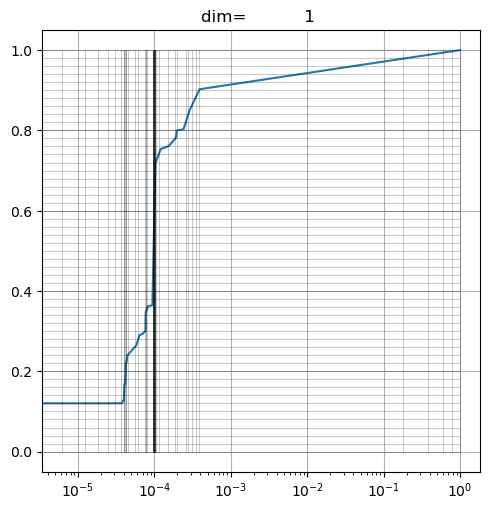

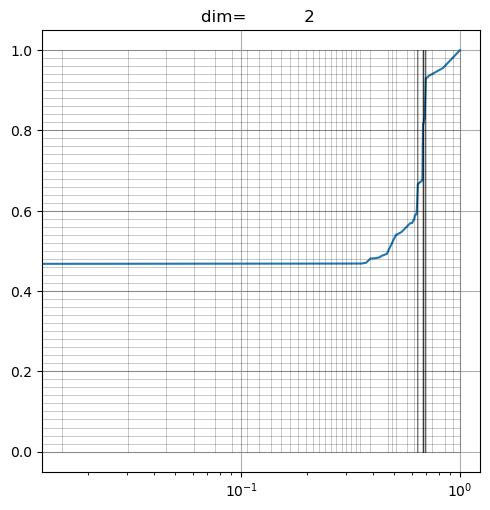

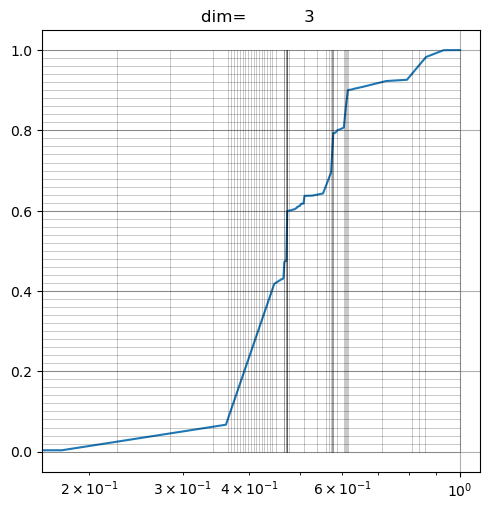

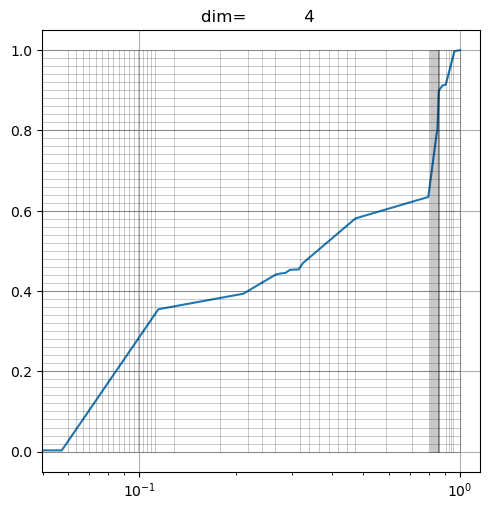

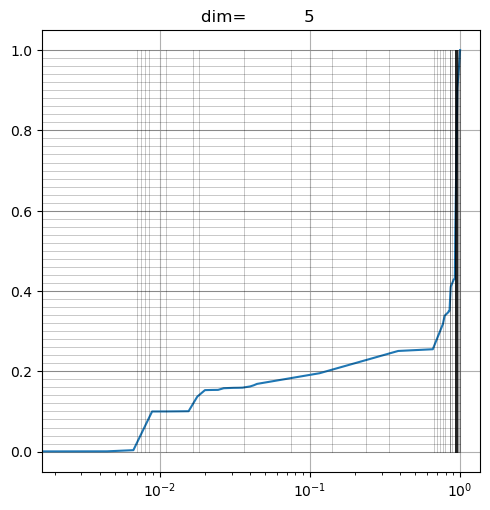

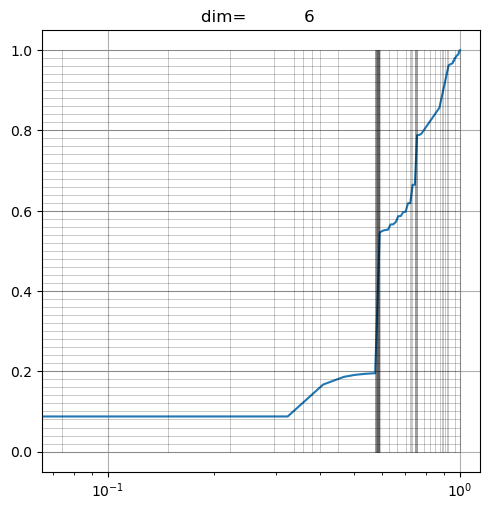

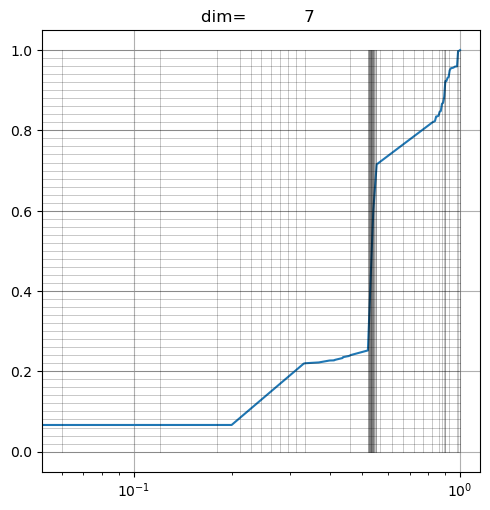

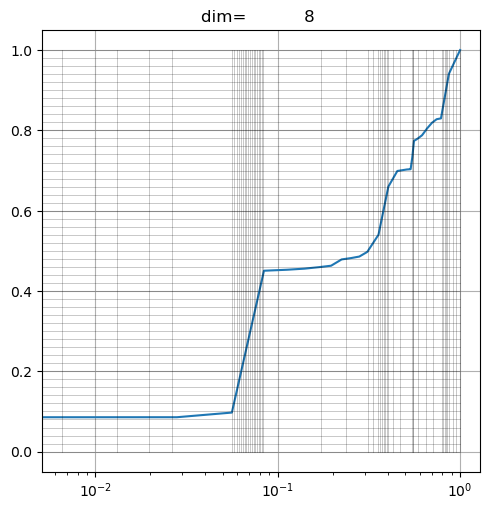

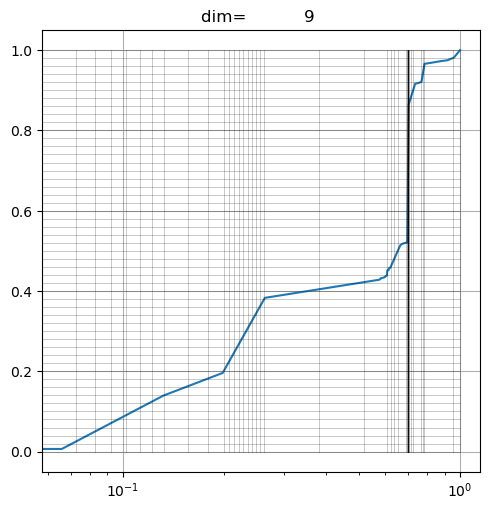

In [8]:
for p in dddf.xs("pwg-btlgrid").xs(1)["plot"]:
    p.show(size=(5,5),fmt="-",logx=True)
#for p in dddf.xs("pwg-rmngrid").xs(1)["plot"]:
#    p.show(size=(5,5),fmt="-")

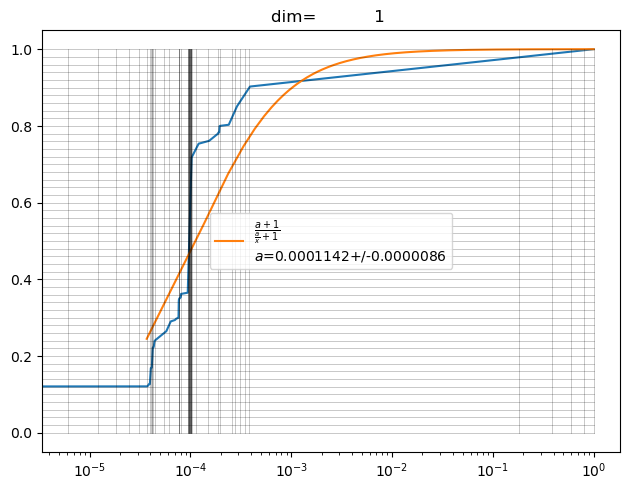

In [9]:
import numpy as np
from uncertainties import unumpy as unp
def fitr(x,a):
    return (a+1)/(a/x+1)
for p in [dddf.xs("pwg-btlgrid").xs(1)["plot"][0]]:
    p.fit(fitr,size=(5,5),fmt="-",logx=True,fselector=lambda x,y : np.logical_and(x>0,x>0) ,extrapolate=False,steps=10000)

 63%|████████████████████████████████████████████████████████████████████████████▋                                            | 19/30 [00:00<00:00, 179.36it/s]/home/apn/.local/lib/python3.10/site-packages/smpl/functions.py:111: RuntimeWarning: overflow encountered in power
  return a * (x) ** k + y
/usr/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3.10/site-packages/uncertainties/core.py:188: RuntimeWarning: invalid value encountered in divide
  covariance_mat/norm_vector/norm_vector[:,numpy.newaxis],
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.20it/s]


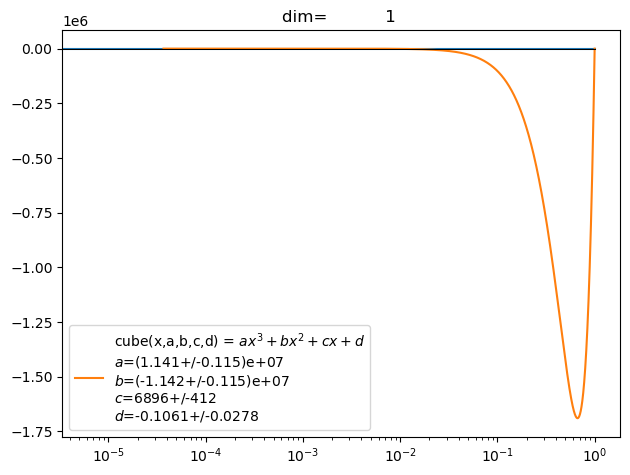

In [10]:

for p in [dddf.xs("pwg-btlgrid").xs(1)["plot"][0]]:
    p.auto(size=(10,10),fmt="-",logx=True,fselector=lambda x,y : x>0,extrapolate=False)

# 